**PROJECT: Building a price indicator for stocks using Apple company's data**

**BUSINESS UNDERSTANDING:Moving averages (MA) are valuable in the financial  market , amongst many other aspects they can assist with:**

**Trend Identification:Moving averages help identify the underlying trend in a stock's price movement
Support and Resistance Levels: Moving averages can act as support or resistance levels for a stock's price.
Volatility Smoothing: They can help smooth out short-term volatility in a price, making it easier to spot significant price movements or trends
Confirmation of Price Movements: Moving averages can confirm the strength or weakness of price movements.
Indicator for Trend Reversals: Moving average crossovers and changes in the slope of moving averages can indicate potential trend reversals in a stock's price.**

**OBJECTIVE : To build an indicator system that  uses the dual exponential moving  average crossover to determine when to buy and sell stocks.**

I obtained the dataset through the yfinance library from yahoo finance




**OBJECTIVE UNDERSTANDING: To build a system that  uses the dual exponential moving  average crossover to determine when to buy and sell stocks.**

**IMPORTING THE NECESSARY LIBRARIES**

In [294]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

In [295]:

data= yf.download("AAPL", start="2018-01-05", end="2022-11-30")

[*********************100%%**********************]  1 of 1 completed


**EXPLORATORY DATA ANALYSIS**

In [296]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425117,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271255,82271200
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.266529,86336000
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.257061,95839600
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.491405,74670800


In [297]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-22,148.130005,150.419998,146.929993,150.179993,149.541977,51804100
2022-11-23,149.449997,151.830002,149.339996,151.070007,150.428223,58301400
2022-11-25,148.309998,148.880005,147.119995,148.110001,147.480774,35195900
2022-11-28,145.139999,146.639999,143.380005,144.220001,143.607300,69246000
2022-11-29,144.289993,144.809998,140.350006,141.169998,140.570267,83763800


In [298]:
data.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425117,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271255,82271200
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.266529,86336000
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.257061,95839600
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.491405,74670800
...,...,...,...,...,...,...
2022-11-22,148.130005,150.419998,146.929993,150.179993,149.541977,51804100
2022-11-23,149.449997,151.830002,149.339996,151.070007,150.428223,58301400
2022-11-25,148.309998,148.880005,147.119995,148.110001,147.480774,35195900


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2018-01-05 to 2022-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [300]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1234.0,9.743454e+01,4.635781e+01,3.599500e+01,5.083000e+01,8.808875e+01,1.427650e+02,1.826300e+02
High,1234.0,9.861662e+01,4.695049e+01,3.643000e+01,5.127562e+01,8.899500e+01,1.443300e+02,1.829400e+02
Low,1234.0,9.630722e+01,4.575494e+01,3.550000e+01,5.046062e+01,8.753875e+01,1.406775e+02,1.791200e+02
Close,1234.0,9.750903e+01,4.637488e+01,3.554750e+01,5.087875e+01,8.811500e+01,1.427700e+02,1.820100e+02
Adj Close,1234.0,9.580229e+01,4.652634e+01,3.416383e+01,4.926081e+01,8.639478e+01,1.412953e+02,1.801910e+02
Volume,1234.0,1.175490e+08,5.531424e+07,3.519590e+07,8.077320e+07,1.032172e+08,1.375076e+08,4.265100e+08


In [301]:
data.shape

(1234, 6)

**DATA VISUALISATION**

<Axes: >

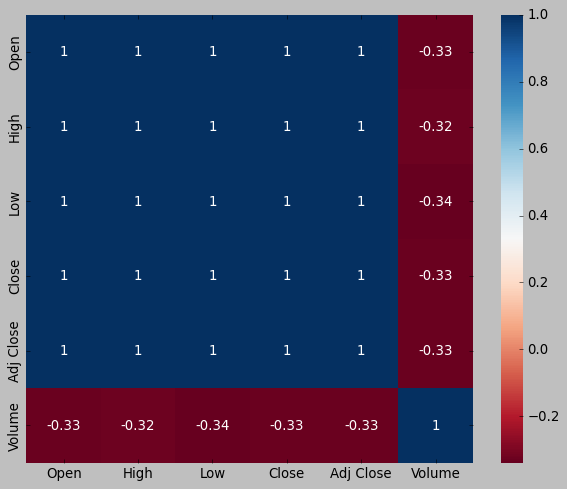

In [302]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(), cmap="RdBu" ,annot=True) 

From the above we can see that there is multicollinearity between the variables with the exception of volume.

**ADJUSTED CLOSING PRICE VISUALISATION**

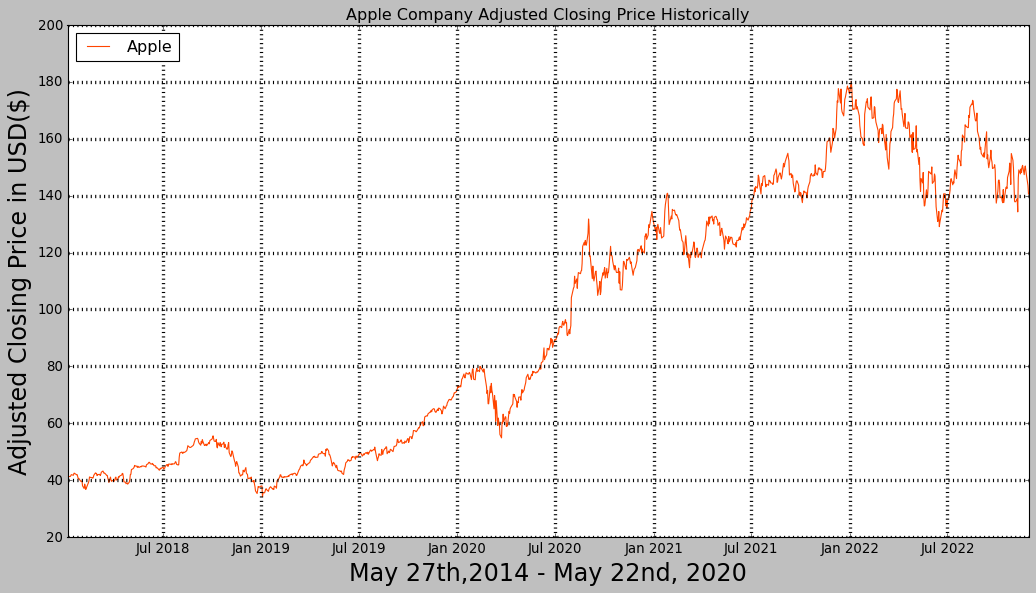

In [303]:
plt.figure(figsize=(15.5,8))
plt.plot(data['Adj Close'],color='#ff4500', label='Apple')
plt.grid(linewidth='3',color='k')
plt.title('Apple Company Adjusted Closing Price Historically')
plt.xlabel("May 27th,2014 - May 22nd, 2020",fontsize=21.5)
plt.ylabel("Adjusted Closing Price in USD($)",fontsize=21.5)
plt.legend(loc="upper left")
plt.show()


**INCOPERATION OF EXPONENTIAL MOVING AVERAGE**

In [304]:
ema28=pd.DataFrame()

In [305]:

ema28["Adj Close"]= data["Adj Close"].ewm(span=28,adjust=False).mean()
ema28

,Adj Close
Date,
2018-01-05,41.425117
2018-01-08,41.414506
2018-01-09,41.404301
2018-01-10,41.394147
2018-01-11,41.400854
...,...
2022-11-22,146.404803
2022-11-23,146.682280
2022-11-25,146.737349


In [306]:
ema90=pd.DataFrame()

In [307]:

ema90["Adj Close"]= data["Adj Close"].ewm(span=90, adjust=False).mean()
ema90


,Adj Close
Date,
2018-01-05,41.425117
2018-01-08,41.421736
2018-01-09,41.418325
2018-01-10,41.414781
2018-01-11,41.416465
...,...
2022-11-22,149.169565
2022-11-23,149.197228
2022-11-25,149.159504


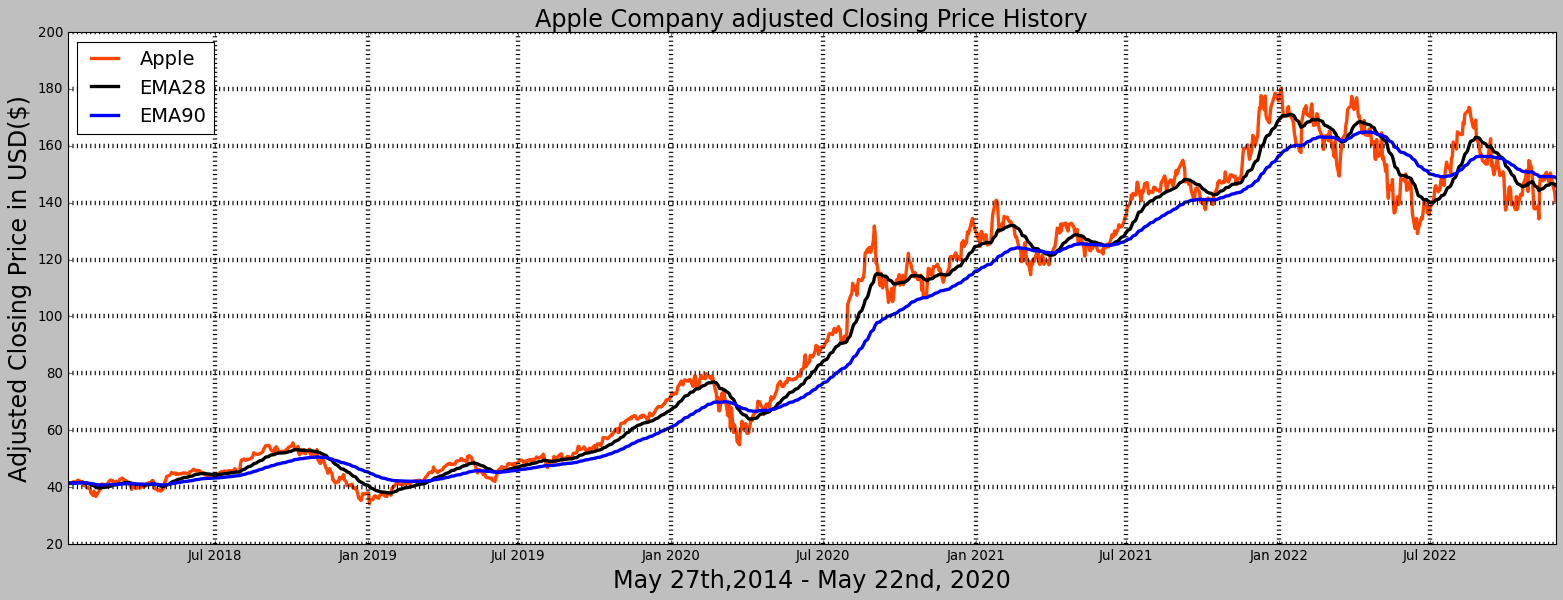

In [308]:
plt.figure(figsize=(24,8))
plt.plot(data['Adj Close'],color='#ff4500', linewidth='3',label='Apple')
plt.plot(ema28['Adj Close'],color='k',linewidth ='3',label='EMA28')
plt.plot(ema90['Adj Close'],color='blue',linewidth='3',label='EMA90')
plt.title('Apple Company adjusted Closing Price History',fontsize=21.5)
plt.xlabel("May 27th,2014 - May 22nd, 2020",fontsize=21.5)
plt.ylabel("Adjusted Closing Price in USD($)",fontsize=21.5)
plt.legend(loc="upper left",fontsize=17.5)
plt.grid(linewidth=4,color='k')
plt.show()


In [309]:
Data_b=pd.DataFrame()

In [310]:
Data_b["Apple Price"] =data["Adj Close"] 

In [311]:
Data_b["EMA28"] =ema28["Adj Close"] 

In [312]:
Data_b["EMA90"]=ema90["Adj Close"] 

In [313]:
Data_b.head()

,Apple Price,EMA28,EMA90
Date,,,
2018-01-05,41.425117,41.425117,41.425117
2018-01-08,41.271255,41.414506,41.421736
2018-01-09,41.266529,41.404301,41.418325
2018-01-10,41.257061,41.394147,41.414781
2018-01-11,41.491405,41.400854,41.416465


In [314]:
Data_b.tail()

,Apple Price,EMA28,EMA90
Date,,,
2022-11-22,149.541977,146.404803,149.169565
2022-11-23,150.428223,146.682280,149.197228
2022-11-25,147.480774,146.737349,149.159504
2022-11-28,143.607300,146.521483,149.037477
2022-11-29,140.570267,146.111055,148.851385


**LETS CREATE THE  BUYING AND SELLING SIGNAL**

In [315]:
def BuySell(Data_b):
    PriceBuySignal = []
    PriceSellSignal = []
    flag = -1
    for i in range(len(Data_b)):
        if Data_b ['EMA28'][i] > Data_b['EMA90'][i]:
            if flag != 1:
                 PriceBuySignal.append(Data_b['Apple Price'][i])
                 PriceSellSignal.append(np.nan)
                 flag = 1
            else:
                PriceBuySignal.append(np.nan)
                PriceSellSignal.append(np.nan)
        elif Data_b['EMA28'][i] < Data_b['EMA90'][i]:
            if flag != 0:
                PriceBuySignal.append(np.nan)
                PriceSellSignal.append(Data_b['Apple Price'][i])
                flag = 0
            else:
                PriceBuySignal.append(np.nan)
                PriceSellSignal.append(np.nan)
        else:
            PriceBuySignal.append(np.nan)
            PriceSellSignal.append(np.nan)
    return(PriceBuySignal, PriceSellSignal)

In [316]:
BuySell=BuySell(Data_b) 

In [317]:
Data_b['Buy_Signal_Price'] =BuySell[0]

In [318]:
Data_b['Sell_Signal_Price'] =BuySell[1]

**LETS HAVE A LOOK AT OUR COMPLILED DATA TABLE**

In [319]:
Data_b

,Apple Price,EMA28,EMA90,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2018-01-05,41.425117,41.425117,41.425117,NaN,NaN
2018-01-08,41.271255,41.414506,41.421736,NaN,41.271255
2018-01-09,41.266529,41.404301,41.418325,NaN,NaN
2018-01-10,41.257061,41.394147,41.414781,NaN,NaN
2018-01-11,41.491405,41.400854,41.416465,NaN,NaN
...,...,...,...,...,...
2022-11-22,149.541977,146.404803,149.169565,NaN,NaN
2022-11-23,150.428223,146.682280,149.197228,NaN,NaN
2022-11-25,147.480774,146.737349,149.159504,NaN,NaN


**FINAL PLOTTING**

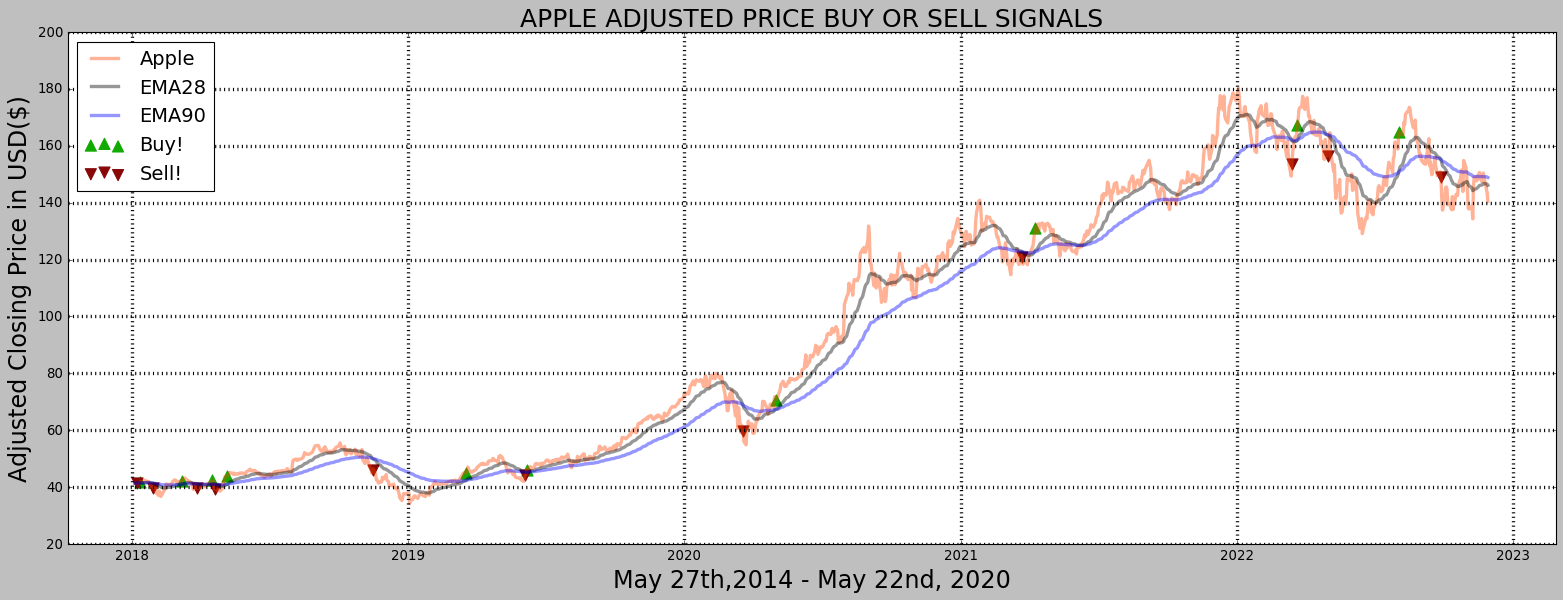

In [320]:
plt.style.use('classic')
plt.figure(figsize=(24,8))
plt.plot(Data_b['Apple Price'], label='Apple',linewidth=3,color='#ff4500',alpha=0.41)
plt.plot(Data_b['EMA28'],label='EMA28',color='k',linewidth='3',alpha=0.41)
plt.plot(Data_b['EMA90'],label='EMA90',color='blue', linewidth='3',alpha=0.41)
plt.scatter(Data_b.index, Data_b['Buy_Signal_Price'],label='Buy!',marker='^',color="#11aa00", s=100)
plt.scatter(Data_b.index,Data_b['Sell_Signal_Price'],label='Sell!',marker='v',color="#880808",s=100)
plt.title('APPLE ADJUSTED PRICE BUY OR SELL SIGNALS',fontsize=22.5)
plt.xlabel("May 27th,2014 - May 22nd, 2020",fontsize=21.5)
plt.ylabel("Adjusted Closing Price in USD($)",fontsize=21.5)
plt.legend(loc="upper left",fontsize=17.5)
plt.grid(linewidth=3,color='k')
plt.show()

              

**We have now produced an adjusted closing price predictor of the technology giant Apple using the exponential moving averages.**